In [131]:
import pandas as pd
import numpy as np
import xarray as xr
import scipy.stats as scipy 
import os
from google.colab import drive
import glob



drive.mount('/content/drive')
# files = os.listdir("/content/drive/My Drive/Datos_Brutos")

df=pd.read_csv("drive/My Drive/Datos_Brutos/Variables_estacion.txt", sep="\t")
# print(len(os.listdir("/content/drive/My Drive/Datos_Brutos/2019")))

def abrir(df): #Función para abrir los archivos en la cual ya tenemos el path de los archivos y de esta manera optimizamos el trabajo y evitamos errores
    df=pd.read_csv("/content/drive/My Drive/Datos_Brutos/2019/"+df+".txt",sep="\t") #Abrir archivo 
    return df

l=[] # Arreglo para los días del mes vacío que luego se completa con el ciclo for, para tener los días del 1 al 31
meses=["agosto","diciembre","julio","junio","noviembre","octubre"] #Arreglo para los meses en los que se encuentran los datos 

for i in range(1,32): # Ciclo que se mencionó anteriormente
    l.append(str(i))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
d=[] #Definir lista de ceros de los DataFrames
dic={} #Definir diccionario en el cual 

for i in meses: #ciclos for en los cuales se va a abrir los archivos y las variaciones de nombres entre estos.
    for j in l:
        try:
            ruta="datos a "+i+" "+j+" de 2019"
            dic[ruta]=abrir(ruta)
            d.append(abrir(ruta))
        except:
            pass
        try:
            ruta="datos a "+i+"  "+j+" de 2019"
            d.append(abrir(ruta))
            dic[ruta]=abrir(ruta)
        except:
            pass
        try:
            ruta="datos a "+i+" "+j+"  de 2019"
            d.append(abrir(ruta))
            dic[ruta]=abrir(ruta)
        except:
            pass


In [133]:
s=['datos a julio 3  de 2019',
 'datos a julio 4 de 2019',
 'datos a julio 5 de 2019']
for i in s:
    dic[i].reset_index(inplace=True)

def rename(df): #Función para re nombrar las columnas
    dic={}
    for i in range(len(df.columns.values)):
        f=df.columns.values[i]
        if df.columns.values[i][0:7]=="Unnamed":
            f=""
        dic[df.columns.values[i]]=df.loc[0][i]+" "+f
    df.rename(columns=dic,inplace=True)
    return df
c=0
n=[]
for key,value in dic.items():
    try:
        rename(dic[key])
    except:
        n.append(key)
        c+=1
        pass


In [134]:
def rename_otras(df1,df2): #Rename Las que faltaron
    dic={}
    for i in range(len(df1.columns.values)):
        dic[df1.columns.values[i]]=df2.columns.values[i]
    df1.rename(columns=dic,inplace=True)
    return 

for i in n:
    rename_otras(dic[i],dic["datos a agosto 3 de 2019"])  

In [135]:
for i in s:
    dic[i].rename(columns={"Date index":"Date "},inplace=True)

In [136]:
df=pd.DataFrame()
m=[]
for i in dic.keys():
    dic[i]=dic[i].loc[1:]
for key in dic.keys():
    try:
        df=pd.concat([df,dic[key]],axis=0)
        # print(key)
    except:
        print(key+" MALO!")
        m.append(key)
        pass

In [137]:
c=0
for i in dic.keys():
    c=dic[i].shape[0]+c
c==df.shape[0]

True

In [138]:
df["Hora"]=df["Time "].str.split(" ",n=1,expand=True)[0]
df["Sufix"]=df["Time "].str.split(" ",n=1,expand=True)[1]

# df["Hora"][550][:-3]

In [139]:
df.reset_index(inplace=True)
df.drop(["index"],inplace=True, axis=1)
def horas(df):
    for i in df.index:
        x=int(df["Hora"][i][:-3])
        if df["Sufix"][i]=="a":
            if x==12:
                x=0
        elif df["Sufix"][i]=="p":
            if x==12:
                x=12
            elif x<12:
                x=x+12
        df["Hora"][i]=str(x)+df["Hora"][i][-3:]

horas(df)

In [140]:
df["Date"]=df["Date "]+" "+df["Hora"]
df.drop(["Date ","Time ","Hora","Sufix"],axis=1, inplace=True)

In [141]:

df.to_csv("/content/drive/My Drive/Datos_Brutos/DataFrames/2019_4.csv",index=False)


# **DATOS** *2020* ☁



In [142]:
path="/content/drive/My Drive/Datos_Brutos/2020/"
x=glob.glob(path+"/*.txt")

In [143]:
dic={}
l=[]

def abrir1(df):
    df=pd.read_csv(df,sep="\t")
    return(df)

for i in x:
    t=i.split("/")[-1].split(".")[0]
    l.append(t)
    dic[t]=abrir1(i)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [144]:
x=dic[l[0]].columns
c=0
k=[]
for i in dic.keys():
    try:
        f=dic[i].columns==x
    except:
        k.append(i)
        for j in f:
            if j==False:
                c+=1
    try:
        rename(dic[i])
    except:
        k.append(i)

In [145]:
dic[k[0]].drop("Arc.",axis=1,inplace=True)

In [146]:
for i in range(0,38):
    dic[k[0]].rename({dic[k[0]].columns[i]:dic[l[0]].columns[i]},axis=1,inplace=True)

In [147]:
for i in dic.keys():
    dic[i]=dic[i].loc[1:]

In [148]:
df20=pd.DataFrame()
for key in dic.keys():
    try:
        df20=pd.concat([df20,dic[key]],axis=0)
        # print(key)
    except:
        print(key+" MALO!")
        m.append(key)
        pass
c=0
for i in dic.keys():
    c=dic[i].shape[0]+c
c==df20.shape[0]

True

In [149]:
df20["Hora"]=df20["Time "].str.split(" ",n=1,expand=True)[0]
df20["Sufix"]=df20["Time "].str.split(" ",n=1,expand=True)[1]
df20.reset_index(inplace=True)
df20.drop(["index"],inplace=True, axis=1)
df20["Date"]=df20["Date "]+" "+df20["Time "]
df20.drop_duplicates(subset="Date",inplace=True)
horas(df20)
df20["Date"]=df20["Date "]+" "+df20["Hora"]
# df20.drop(["Date ","Time ","Hora","Sufix"],axis=1, inplace=True)

In [150]:
df20.drop_duplicates(subset="Date",inplace=True)
df20.to_csv("/content/drive/My Drive/Datos_Brutos/DataFrames/2020_2.csv",index=False)

In [151]:
# import matplotlib.pyplot as plt
# ax=plt.figure(figsize=(20,10))
# df20["Date"]=pd.to_datetime(df20["Date"],format="%d/%m/%y %H:%M")
# df20["Hor"]=df20["Date"].dt.hour
# df20["Mean12"]=df20["Rad. Solar"][df20["Hor"]==11].astype(int).mean()
# df20.sort_values(by="Date",ascending=True,inplace=True)
# plt.plot(df20["Date"][df20["Hor"]==11],df20["Rad. Solar"][df20["Hor"]==11].astype(int))

# ***DATOS 2021*** ⛈

In [152]:
path="/content/drive/My Drive/Datos_Brutos/2021/"
x=glob.glob(path+"/*.txt")
dic={}
l=[]

for i in x:
    t=i.split("/")[-1].split(".")[0]
    l.append(t)
    dic[t]=abrir1(i)
x=dic[l[0]].columns
c=0
k=[]
for i in dic.keys():
    try:
        f=dic[i].columns==x
    except:
        k.append(i)
        for j in f:
            if j==False:
                c+=1
    try:
        rename(dic[i])
    except:
        k.append(i)
    dic[i]=dic[i].loc[1:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [153]:
df21=pd.DataFrame()
for i in dic.keys():
    df21=pd.concat([df21,dic[i]],axis=0)

In [154]:
colunas=pd.read_csv("/content/drive/My Drive/Datos_Brutos/DatosEstacion2021-11-06.csv").columns


In [155]:
df21["Hora"]=df21["Time "].str.split(" ",n=1,expand=True)[0]
df21["Sufix"]=df21["Time "].str.split(" ",n=1,expand=True)[1]
df21.reset_index(inplace=True)
df21.drop(["index"],inplace=True, axis=1)
df21["Date"]=df21["Date "]+" "+df21["Time "]
df21.drop_duplicates(subset="Date", inplace=True)
horas(df21)
df21["Date"]=df21["Date "]+" "+df21["Hora"]

In [156]:
df21.drop_duplicates(subset="Date",inplace=True)
df21.drop(["Date ","Time ","Hora","Sufix"],axis=1, inplace=True)
df21.to_csv("/content/drive/My Drive/Datos_Brutos/DataFrames/2021_2.csv",index=False)

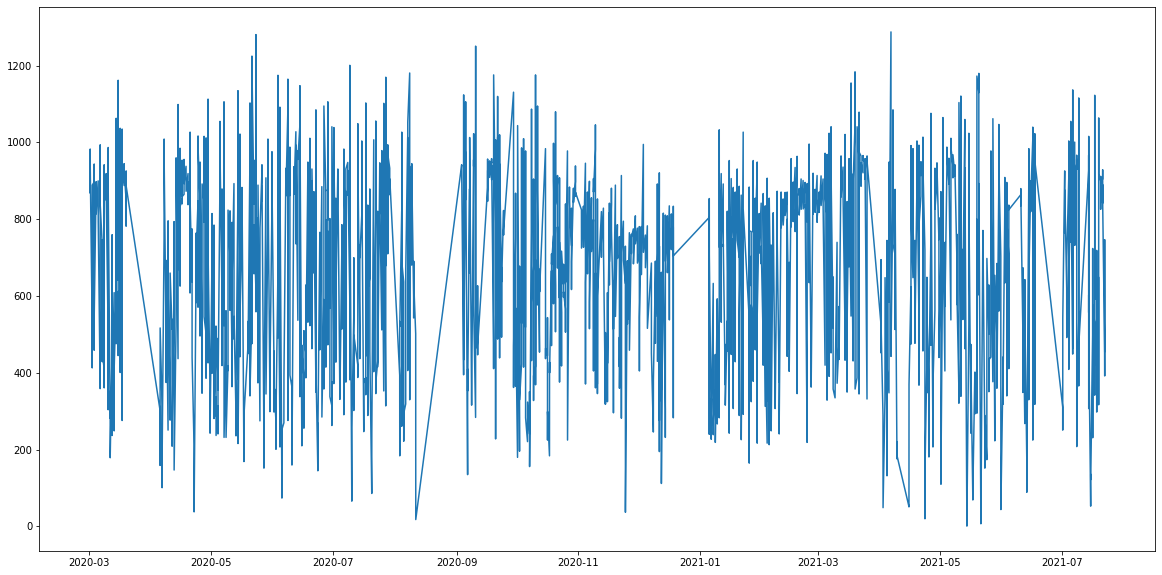

In [157]:
ax=plt.figure(figsize=(20,10))
df21["Date"]=pd.to_datetime(df21["Date"],format="%d/%m/%y %H:%M")
df21["Hor"]=df21["Date"].dt.hour
df21["Mean12"]=df21["Rad. Solar"][df21["Hor"]==12].astype(int).mean()
df21.sort_values(by="Date",ascending=True,inplace=True)
plt.plot(df21["Date"][df21["Hor"]==12],df21["Rad. Solar"][df21["Hor"]==12].astype(int))